<a href="https://colab.research.google.com/github/pablohd10/P2.2-RRNN/blob/main/P2.2_RRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

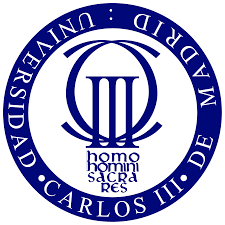

# PRÁCTICA 2.2: REDES DE NEURONAS
Autores: Pablo Hidalgo Delgado y Marcos Caballero Cortés   

NIAs: 100451225 y 100451047


# 1.- Introducción

# 2.- Importación de las librerías

In [25]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical

In [19]:
!pip install pillow

# 3.- Preproceso

In [9]:
# Unzip the dataset
!unzip -q UCMerced_LandUse.zip
# Remove the zip file
!rm UCMerced_LandUse.zip
# Rename UCMerced_LandUse to data
!mv UCMerced_LandUse data

In [20]:
category_names = {
0: 'agricultural',
1: 'airplane',
2: 'baseballdiamond',
3: 'beach',
4: 'buildings',
5: 'chaparral',
6: 'denseresidential',
7: 'forest',
8: 'freeway',
9: 'golfcourse',
10: 'harbor',
11: 'intersection',
12: 'mediumresidential',
13: 'mobilehomepark',
14: 'overpass',
15: 'parkinglot',
16: 'river',
17: 'runway',
18: 'sparseresidential',
19: 'storagetanks',
20: 'tenniscourt'}
N_images = 100

In [22]:
# Optimization. Save the dataset as Numpy file. The first time (if it does not exist), it has to be prepared
UCMerced_images_orig = os.path.join('data','UCMerced_images_orig.npy')
UCMerced_labels_num = os.path.join('data','UCMerced_labels_num.npy')
# Load the original dataset
data_dir = 'data/Images'
images_orig = []
labels_num = []
if os.path.isfile(UCMerced_images_orig) and os.path.isfile(UCMerced_labels_num): #If already in numpy format
  images_orig = np.load('data/UCMerced_images_orig.npy')
  labels_num = np.load('data/UCMerced_labels_num.npy')
else: # Not in numpy yet, preparing it
  for i in range(len(category_names)):
    for j in range(N_images):
      img_path = os.path.join(data_dir, category_names[i], category_names[i]+'{:02d}.tif'.format(j))
      # Open the image and save each channel
      img = Image.open(img_path)
      img = img.resize((256, 256), Image.ANTIALIAS)
      arr = np.asarray(img)
      images_orig.append(arr)
      labels_num.append([i])
# Convert the array to numpy array
images_orig = np.array(images_orig)
labels_num = np.array(labels_num)
# Save the numpy datasets
np.save(UCMerced_images_orig, images_orig)
np.save(UCMerced_labels_num, labels_num)

<ipython-input-22-6135c5502e98>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((256, 256), Image.ANTIALIAS)


## One hot encoding

In [26]:
# Después de cargar o preparar tus etiquetas (labels_num), puedes realizar one-hot encoding así:
labels = to_categorical(labels_num, len(category_names))

# Guardar el nuevo conjunto de datos
np.save(UCMerced_images_orig, images_orig)
np.save(UCMerced_labels_num, labels)

Para ver que estamos guardando y como:

Shape de UCMerced_images_orig: (2100, 256, 256, 3)
Shape de UCMerced_labels_num: (2100, 21)
Primer elemento de UCMerced_images_orig:
[[[ 44  41  45]
  [ 53  50  56]
  [ 47  44  50]
  ...
  [125 126 122]
  [137 137 130]
  [119 119 111]]

 [[ 41  38  42]
  [ 46  43  46]
  [ 44  41  45]
  ...
  [ 83  83  81]
  [124 124 118]
  [135 131 126]]

 [[ 42  39  43]
  [ 44  41  44]
  [ 43  40  44]
  ...
  [ 90  95  91]
  [ 99 103  98]
  [101  99  97]]

 ...

 [[175 173 175]
  [190 191 189]
  [223 223 221]
  ...
  [144 144 136]
  [135 135 126]
  [124 123 118]]

 [[120 113 120]
  [151 147 150]
  [168 166 165]
  ...
  [123 121 117]
  [126 121 117]
  [133 129 124]]

 [[128 118 127]
  [113 103 110]
  [122 114 118]
  ...
  [101 101  99]
  [ 99  95  94]
  [135 129 127]]]
Primer elemento de UCMerced_labels_num:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


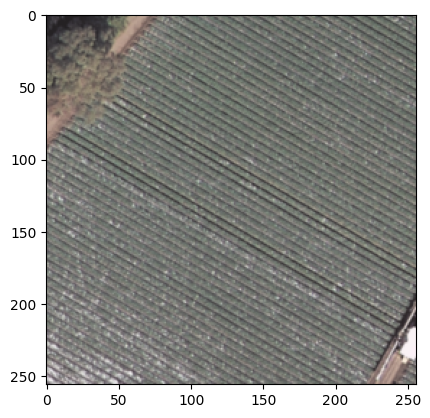

In [30]:
# Cargar los datos desde los archivos Numpy
loaded_images = np.load(UCMerced_images_orig)
loaded_labels = np.load(UCMerced_labels_num)

# Imprimir algunas estadísticas y visualizar el contenido
print("Shape de UCMerced_images_orig:", loaded_images.shape)
print("Shape de UCMerced_labels_num:", loaded_labels.shape)

# Puedes imprimir algunos elementos específicos para ver su contenido
print("Primer elemento de UCMerced_images_orig:")
print(loaded_images[0])

print("Primer elemento de UCMerced_labels_num:")
print(loaded_labels[0])

# Si son imágenes, también puedes visualizarlas
import matplotlib.pyplot as plt

plt.imshow(loaded_images[0])  # Ajusta según el formato de tus imágenes
plt.title(f"Label: {loaded_labels[0]}")
plt.show()


# 4.- PM

# 5.- CNN